In [3]:
import yfinance as yf
import time
import datetime

stock_symbol = 'ANTM.JK'


In [4]:
data = yf.download(tickers=stock_symbol,start='2016-9-23',end='2021-9-23',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-23,665.0,690.0,665.0,665.0,645.098206,45387900
2016-09-26,660.0,680.0,640.0,645.0,625.696777,40092100
2016-09-27,645.0,780.0,630.0,770.0,746.955872,504324900
2016-09-28,785.0,810.0,760.0,795.0,771.207642,351019700
2016-09-29,810.0,850.0,810.0,830.0,805.160156,441474400


In [7]:

len(data)

1260

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-16,2520.0,2550.0,2390.0,2410.0,2410.0,163306000
2021-09-17,2370.0,2430.0,2370.0,2400.0,2400.0,61535600
2021-09-20,2380.0,2390.0,2330.0,2350.0,2350.0,82487500
2021-09-21,2350.0,2370.0,2300.0,2360.0,2360.0,66014000
2021-09-22,2370.0,2410.0,2330.0,2340.0,2340.0,88209700


In [9]:
opn = data[['Open']]


<AxesSubplot:xlabel='Date'>

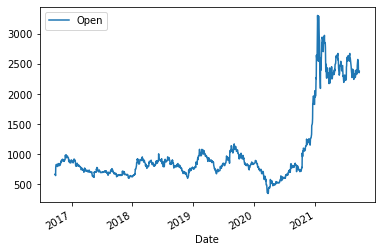

In [10]:
opn.plot()

In [11]:

import matplotlib.pyplot as plt

In [12]:
ds = opn.values


In [13]:

ds

array([[ 665.],
       [ 660.],
       [ 645.],
       ...,
       [2380.],
       [2350.],
       [2370.]])

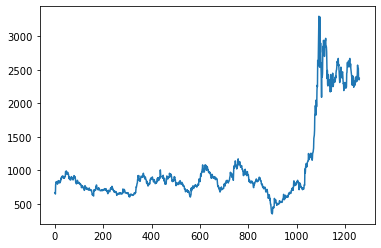

In [14]:

plt.plot(ds)

In [15]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [16]:

#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [17]:

len(ds_scaled), len(ds)

(1260, 1260)

In [18]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [19]:
train_size,test_size

(882, 378)

In [20]:
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [21]:
len(ds_train), len(ds_test)

(882, 378)

In [22]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [57]:

#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [58]:
X_train.shape,y_train.shape

((781, 100), (781,))

In [59]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
len(X_train), len(X_test)

(781, 277)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [62]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=100,return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [63]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
13/13 [==============================] - 4s 345ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0637 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 3s 261ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0797 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 3s 263ms/step - loss: 6.9036e-04 - accuracy: 0.0000e+00 - val_loss: 0.0624 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 3s 258ms/step - loss: 5.2658e-04 - accuracy: 0.0000e+00 - val_loss: 0.0404 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 3s 261ms/step - loss: 4.1222e-04 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0036
Epoch 6/100
13/13 [==============================] - 4s 278ms/step - loss: 3.5009e-04 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0036
Epoch 7/100
13/13 [==============================] - 4s 279ms/step - loss: 3.2087e-04 

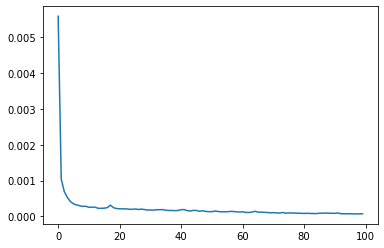

In [64]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [65]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [66]:
len(test_predict), len(train_predict)

(277, 781)

In [67]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

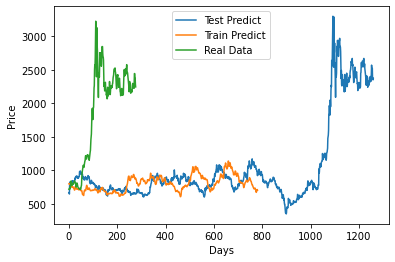

In [98]:
#Comparing using visuals

plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)
plt.ylabel("Price")
plt.xlabel("Days")

plt.legend(['Test Predict', 'Train Predict','Real Data'])

In [94]:
len(ds_scaled), len(train_predict), len(test_predict)

(1260, 781, 277)

In [69]:
type(train_predict)

numpy.ndarray

In [70]:
test = np.vstack((train_predict,test_predict))

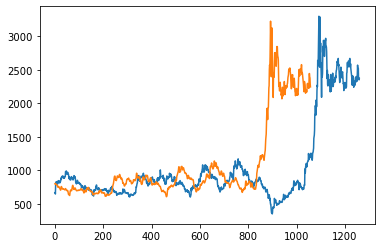

In [71]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [72]:
len(ds_test)

378

In [73]:
#Getting the last 100 days records
fut_inp = ds_test[278:]

In [74]:
fut_inp = fut_inp.reshape(1,-1)

In [75]:
tmp_inp = list(fut_inp)

In [76]:
fut_inp.shape

(1, 100)

In [77]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [78]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.64678555727005], [0.6280900835990906], [0.6032775044441223], [0.5778340697288513], [0.5531067252159119], [0.5297800302505493], [0.5081429481506348], [0.48811793327331543], [0.46936607360839844], [0.45142170786857605], [0.43381771445274353], [0.41617903113365173], [0.39827653765678406], [0.3800416886806488], [0.3615480065345764], [0.3429720401763916], [0.32454466819763184], [0.3065027892589569], [0.28905239701271057], [0.2723446786403656], [0.2564677894115448], [0.24145016074180603], [0.22727327048778534], [0.2138872891664505], [0.20122765004634857], [0.18922841548919678], [0.1778322011232376], [0.1669950634241104], [0.15668831765651703], [0.146896630525589]]


In [79]:
len(ds_scaled)

1260

In [80]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

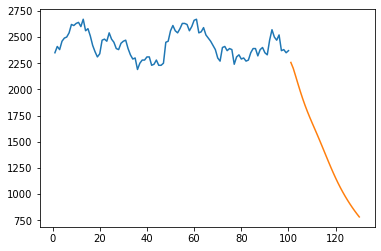

In [81]:

plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1160:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [82]:
ds_new = ds_scaled.tolist()

In [83]:
len(ds_new)

1260

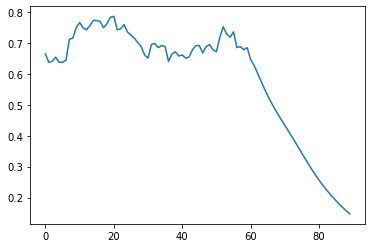

In [84]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [85]:
final_graph = normalizer.inverse_transform(ds_new).tolist()

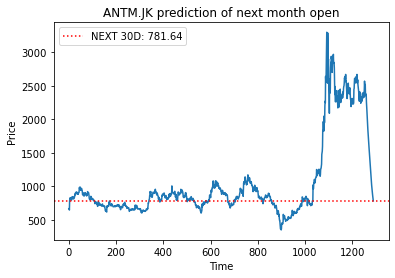

In [86]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()


In [87]:
final_graph

[[665.0],
 [660.0],
 [645.0],
 [785.0],
 [810.0000000000001],
 [825.0],
 [830.0],
 [810.0000000000001],
 [825.0],
 [799.9999999999999],
 [794.9999999999999],
 [805.0000000000001],
 [799.9999999999999],
 [825.0],
 [845.0],
 [830.0],
 [830.0],
 [840.0],
 [830.0],
 [830.0],
 [810.0000000000001],
 [820.0],
 [840.0],
 [835.0],
 [840.0],
 [880.0],
 [870.0000000000001],
 [895.0],
 [900.0],
 [895.0],
 [890.0],
 [914.9999999999999],
 [914.9999999999999],
 [914.9999999999999],
 [900.0],
 [885.0],
 [900.0],
 [885.0],
 [890.0],
 [880.0],
 [905.0],
 [900.0],
 [905.0],
 [914.9999999999999],
 [979.9999999999999],
 [970.0],
 [970.0],
 [990.0000000000001],
 [974.9999999999999],
 [965.0],
 [940.0],
 [965.0],
 [970.0],
 [965.0],
 [965.0],
 [945.0],
 [940.0],
 [900.0],
 [875.0],
 [905.0],
 [885.0],
 [870.0000000000001],
 [859.9999999999999],
 [885.0],
 [859.9999999999999],
 [854.9999999999999],
 [859.9999999999999],
 [890.0],
 [905.0],
 [895.0],
 [895.0],
 [885.0],
 [875.0],
 [880.0],
 [870.0000000000001]

In [88]:
len(final_graph)

1290

In [89]:
print(data[1230:1260])

              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2021-08-10  2270.0  2370.0  2240.0  2340.0     2340.0  131980200
2021-08-12  2400.0  2430.0  2380.0  2400.0     2400.0  127108900
2021-08-13  2410.0  2410.0  2350.0  2380.0     2380.0   66587000
2021-08-16  2370.0  2400.0  2350.0  2390.0     2390.0   48998000
2021-08-18  2390.0  2420.0  2360.0  2400.0     2400.0   85335000
2021-08-19  2380.0  2380.0  2270.0  2270.0     2270.0  131304600
2021-08-20  2240.0  2320.0  2240.0  2280.0     2280.0   71969400
2021-08-23  2310.0  2330.0  2280.0  2290.0     2290.0   65261800
2021-08-24  2330.0  2330.0  2270.0  2270.0     2270.0   43554200
2021-08-25  2290.0  2340.0  2280.0  2300.0     2300.0   61473600
2021-08-26  2300.0  2310.0  2270.0  2270.0     2270.0   30446800
2021-08-27  2270.0  2290.0  2250.0  2260.0     2260.0   31806000
2021-08-30  2280.0  2320.0  2280.0  2310.0     2310.0   37542900
2021-08-31  2350.0  2400.

In [90]:
print(final_graph[1230:1260])

[[2270.0], [2400.0], [2410.0], [2370.0], [2390.0], [2380.0], [2240.0], [2310.0], [2330.0], [2290.0], [2300.0], [2270.0], [2280.0], [2350.0], [2390.0], [2390.0], [2320.0], [2380.0], [2400.0], [2350.0], [2330.0], [2470.0], [2570.0], [2500.0], [2470.0], [2520.0], [2370.0], [2380.0], [2350.0], [2370.0]]


In [91]:
pri=final_graph

In [92]:
print(pri[1230:1260])

[[2270.0], [2400.0], [2410.0], [2370.0], [2390.0], [2380.0], [2240.0], [2310.0], [2330.0], [2290.0], [2300.0], [2270.0], [2280.0], [2350.0], [2390.0], [2390.0], [2320.0], [2380.0], [2400.0], [2350.0], [2330.0], [2470.0], [2570.0], [2500.0], [2470.0], [2520.0], [2370.0], [2380.0], [2350.0], [2370.0]]


In [93]:
import pandas as pd

aa = pd.DataFrame(pri)

aa.to_csv('cb2.csv')